In [58]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mne
from IPython.display import display

In [10]:
def identify_target_type(df, target_column):
    values = df[target_column].dropna().unique()
    n_unique = len(values)
    
    print(f"Etykieta: '{target_column}'")
    print(f"Liczba unikalnych wartości: {n_unique}")
    print(f"Przykładowe wartości: {sorted(values)}\n")
    
    if df[target_column].dtype == 'object':
        print("✅ Wykryto dane tekstowe – zadanie klasyfikacji (najprawdopodobniej wieloklasowej).")
    elif n_unique == 2:
        print("✅ Wykryto 2 klasy – zadanie klasyfikacji binarnej.")
    elif n_unique <= 10 and all(isinstance(v, (int, float)) for v in values):
        print("✅ Wykryto ≤10 wartości numerycznych – zadanie klasyfikacji wieloklasowej.")
    else:
        print("✅ Wartości ciągłe – zadanie regresji.")
        
    print("\nDystrybucja klas (jeśli dotyczy):")
    print(df[target_column].value_counts())


# 1. Alzheimer

## 1.1 Alzheimer disease dataset (Kaggle) ⭐

This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

### Publikacje i artykuły naukowe: 
- [IJISRT article (PDF)](https://www.ijisrt.com/assets/upload/files/IJISRT24JUN1915.pdf)
- [INFEB Journal article](https://infeb.org/index.php/infeb/article/view/1046)
- [Master's thesis – UOC repository (TFM)](https://openaccess.uoc.edu/bitstream/10609/152036/1/TFM_lsarras.pdf)

| Atrybut           | Opis                                                                                                                                                                                                                                     |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data)                                                                       |
| **Liczba próbek** | 35                                                                                                                                                                                                                                       |
| **Cechy**         | `PatientID`, `Age`, `Gender`, `Ethnicity`, `EducationLevel`, `BMI`, `Smoking`, `AlcoholConsumption`, `DietQuality`, `SleepQuality`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `HeadInjury`, `Hypertension`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, `CholesterolHDL`, `CholesterolTriglycerides`, `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks`, `Forgetfulness`, `Diagnosis`, `DoctorInCharge` |
| **Rodzaj etykiet**| Klasyfikacja binarna:<br>• `0` – brak diagnozy<br>• `1` – choroba Alzheimera                                                                                                                                                            |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                                                        |


In [12]:
alzherimer_kaggle_path = ('Alzheimer/alzheimers_disease_data.csv')
alzheimer_kaggle_df = pd.read_csv(alzherimer_kaggle_path)
identify_target_type(alzheimer_kaggle_df, "Diagnosis") 
alzheimer_kaggle_df.head()

Etykieta: 'Diagnosis'
Liczba unikalnych wartości: 2
Przykładowe wartości: [0, 1]

✅ Wykryto 2 klasy – zadanie klasyfikacji binarnej.

Dystrybucja klas (jeśli dotyczy):
Diagnosis
0    1389
1     760
Name: count, dtype: int64


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## 1.2 DARWIN

The DARWIN dataset contains handwriting data, which is composed of 25 handwriting tasks. The protocol  was specifically designed for the early detection of Alzheimer’s disease (AD). The dataset includes data from 174 participants (89 AD patients and 85 healthy people). The DARWIN dataset was created to allow researchers to improve the existing machine learning methodologies for the prediction of Alzheimer's disease via handwriting analysis.

| Atrybut           | Opis                                                                                                                                                                                      |
|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://archive.ics.uci.edu/dataset/732/darwin](https://archive.ics.uci.edu/dataset/732/darwin)                                                                                         |
| **Liczba próbek** | 174                                                                                                                                                                                       |
| **Cechy**         | `ID`, `air_time1`, `disp_index1`, `gmrt_in_air1`, `gmrt_on_paper1`, `max_x_extension1`, ..., `paper_time25`, `pressure_mean25`, `pressure_var25`, `total_time25`                          |
| **Rodzaj etykiet**| Klasyfikacja binarna:<br>• `H` – osoba zdrowa<br>• `P` – pacjent z zaburzeniem                                                                                                            |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                                                |


In [20]:
alzherimer_darwin_path = ('Alzheimer/data.csv')
alzheimer_darwin_df = pd.read_csv(alzherimer_darwin_path)
identify_target_type(alzheimer_darwin_df, "class") 
alzheimer_darwin_df.head()
#columns = ', '.join(alzheimer_darwin_df.columns)
#print(columns)

Etykieta: 'class'
Liczba unikalnych wartości: 2
Przykładowe wartości: ['H', 'P']

✅ Wykryto dane tekstowe – zadanie klasyfikacji (najprawdopodobniej wieloklasowej).

Dystrybucja klas (jeśli dotyczy):
class
P    89
H    85
Name: count, dtype: int64


,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


## 1.3 Augmented Alzheimer MRI Dataset

The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

- Mild Demented
- Moderate Demented
- Non Demented
- Very Mild Demented
The data contains two folders. One of them is augmented ones and the other one is originals.
Originals could be used for validation or test dataset…

Data is augmented from an existing dataset. Original images can be seen in Data Explorer.
https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images

Publisher's purpose of the publish this dataset is to the usage of augmented images as well as originals. The importance of augmentation is can be a little underrated.

| Atrybut           | Opis                                                                                                                                                             |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/data](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/data) |
| **Liczba próbek** | ~40 000 zdjęć                                                                                                                                                    |
| **Cechy**         | Obrazy MRI mózgu w formacie JPEG/PNG, rozmiar 176×208–256×256 px.<br>Przetwarzane jako macierze pikseli (RGB lub grayscale)                                     |
| **Rodzaj etykiet**| Klasyfikacja kategoryczna (4 klasy):<br>• Non Demented<br>• Very Mild Demented<br>• Mild Demented<br>• Moderate Demented                                        |
| **Licencja**      | GNU Lesser General Public License 3.0                                                                                                                            |


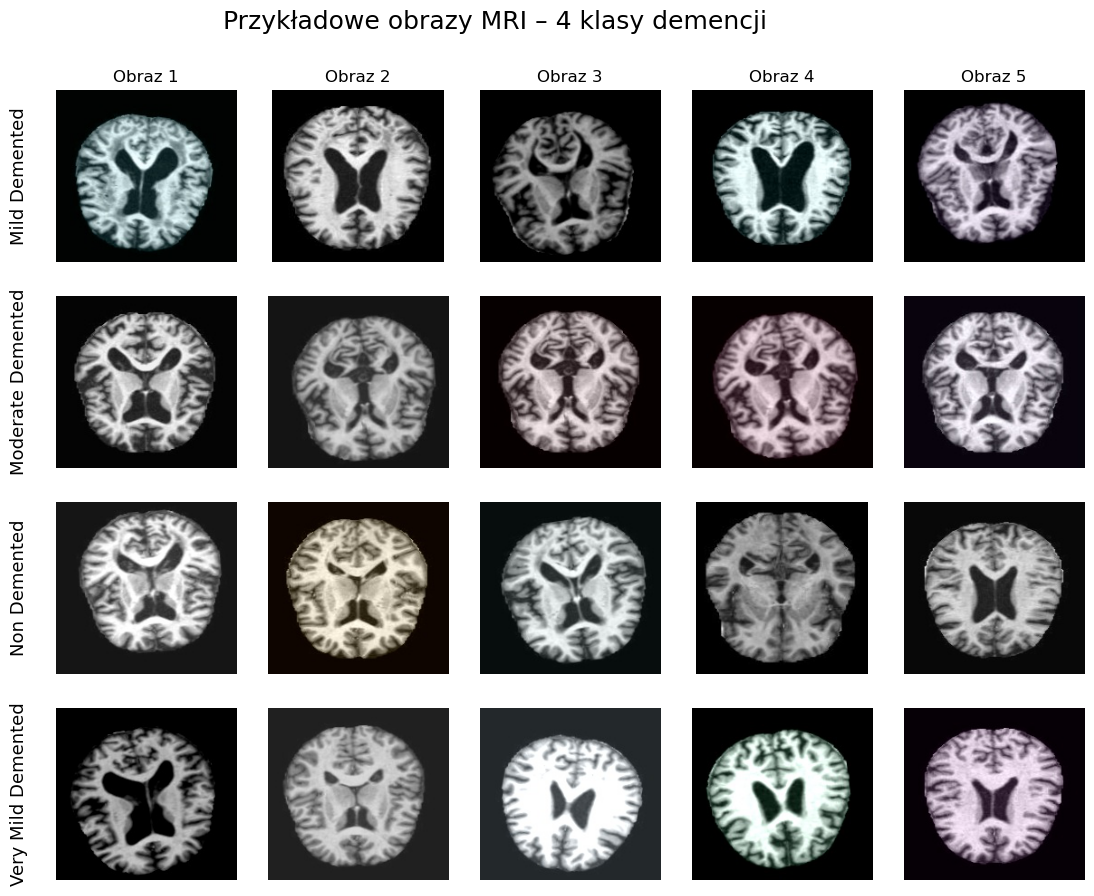

In [29]:
paths = {
    "Mild Demented": "Alzheimer/Augmented Alzheimer_MRI_Dataset/MildDemented",
    "Moderate Demented": "Alzheimer/Augmented Alzheimer_MRI_Dataset/ModerateDemented",
    "Non Demented": "Alzheimer/Augmented Alzheimer_MRI_Dataset/NonDemented",
    "Very Mild Demented": "Alzheimer/Augmented Alzheimer_MRI_Dataset/VeryMildDemented"
}

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))
fig.suptitle("Przykładowe obrazy MRI – 4 klasy demencji", fontsize=18)

for col in range(5):
    axes[0, col].set_title(f"Obraz {col+1}", fontsize=12)

for row, (label, path) in enumerate(paths.items()):
    image_files = [
        f for f in sorted(os.listdir(path))
        if os.path.isfile(os.path.join(path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
    ][:5]

    for col, filename in enumerate(image_files):
        image_path = os.path.join(path, filename)
        img = mpimg.imread(image_path)
        ax = axes[row, col]
        ax.imshow(img, cmap='gray')
        ax.axis('off')

        if col == 0:
            ax.annotate(label, xy=(0, 0.5), xytext=(-axes[row, col].get_position().x0 - 0.02, 0.5),
                        textcoords='axes fraction', fontsize=13, ha='right', va='center', rotation=90,
                        xycoords='axes fraction')

plt.subplots_adjust(left=0.2, top=0.9, wspace=0.05, hspace=0.2)

plt.savefig("alzheimers_classes_grid_labeled.png", dpi=300)
plt.show()


# 2. Parkinson

## 2.1 Parkinson's (UCI, disease) ⭐

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

### Publikacje i artykuły naukowe: 
- [Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection – Little et al.](https://www.semanticscholar.org/paper/Exploiting-Nonlinear-Recurrence-and-Fractal-Scaling-Little-McSharry/27e1dcd0d64bfc9d936e597d4f29b80c21571936)

- [Performance analysis of machine learning techniques in diagnosing Parkinson’s disease – Dutta et al.](https://www.tandfonline.com/doi/full/10.1080/03772063.2018.1531730#abstract)

- [Comparison of Machine Learning Models for Parkinson's Disease Prediction – Kumar et al.](https://ieeexplore.ieee.org/abstract/document/9298033)


| Atrybut           | Opis                                                                                                                                                                                                 |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://archive.ics.uci.edu/dataset/174/parkinsons](https://archive.ics.uci.edu/dataset/174/parkinsons)                                                                                           |
| **Liczba próbek** | 197                                                                                                                                                                                                  |
| **Cechy**         | `MDVP:Fo(Hz)`, `MDVP:Fhi(Hz)`, `MDVP:Flo(Hz)`, `MDVP:Jitter(%)`, `MDVP:Jitter(Abs)`, `MDVP:RAP`, `MDVP:PPQ`, `Jitter:DDP`, `MDVP:Shimmer`, `MDVP:Shimmer(dB)`, `Shimmer:APQ3`, `Shimmer:APQ5`, `MDVP:APQ`, `Shimmer:DDA`, `NHR`, `HNR`, `RPDE`, `D2`, `DFA`, `spread1`, `spread2`, `PPE` |
| **Rodzaj etykiet**| Klasyfikacja binarna:<br>• `0` – osoba zdrowa<br>• `1` – osoba z chorobą Parkinsona                                                                           |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                     |


In [32]:
parkinsons_uci_disease_path = 'Parkinsons/ParkinsonsUCI/parkinsons.data'
parkinsons_uci_disease_df = pd.read_csv(parkinsons_uci_disease_path)
parkinsons_uci_disease_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2.2 Parkinson's (UCI, telemonitoring)

The dataset was created by Athanasios Tsanas (tsanasthanasis '@' gmail.com) 
and Max Little (littlem '@' physics.ox.ac.uk) of the University of Oxford, in 
collaboration with 10 medical centers in the US and Intel Corporation who 
developed the telemonitoring device to record the speech signals. The 
original study used a range of linear and nonlinear regression methods to 
predict the clinician's Parkinson's disease symptom score on the UPDRS scale.

| Atrybut           | Opis                                                                                                                                                                                                 |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://archive.ics.uci.edu/dataset/174/parkinsons](https://archive.ics.uci.edu/dataset/174/parkinsons)                                                                                           |
| **Liczba próbek** | 5875                                                                                                                                                                                                 |
| **Cechy**         | Demograficzne/czasowe: `subject#`, `age`, `sex`, `test_time`<br>Głosowe: `Jitter(%)`, `Jitter(Abs)`, `Jitter:RAP`, `Jitter:PPQ5`, `Jitter:DDP`, `Shimmer`, `Shimmer(dB)`, `Shimmer:APQ3`, `Shimmer:APQ5`, `Shimmer:APQ11`, `Shimmer:DDA`, `NHR`, `HNR`, `RPDE`, `DFA`, `PPE` |
| **Rodzaj etykiet**| Regresja (dwie zmienne ciągłe):<br>• `motor_UPDRS` – ocena objawów ruchowych<br>• `total_UPDRS` – całkowita ocena stanu pacjenta                                                                   |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                     |


In [34]:
parkinsons_uci_telemonitoring_path = 'Parkinsons/ParkinsonsUCI/telemonitoring/parkinsons_updrs.data'
parkinsons_uci_telemonitoring_df = pd.read_csv(parkinsons_uci_telemonitoring_path)
parkinsons_uci_telemonitoring_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## 2.3 Parkinson's Disease Classification

The data used in this study were gathered from 188 patients with Parkinson's Disease (107 men and 81 women) with ages ranging from 33 to 87 (65.1 ± 10.9) at the Department of Neurology in Cerrahpaşa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1 ± 8.9). During the data collection process, the microphone was set to 44.1 kHz, and following the physician’s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

| Atrybut           | Opis                                                                                                                                                                                                 |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification](https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification)                                           |
| **Liczba próbek** | 756                                                                                                                                                                                                  |
| **Cechy**         | 754 wyekstrahowane cechy z sygnału audio (akustyczne, spektralne, statystyczne), np.:<br>`tqwt_kurtosisValue_dec_32`, `tqwt_kurtosisValue_dec_33`, `tqwt_kurtosisValue_dec_34`, `tqwt_kurtosisValue_dec_35` |
| **Rodzaj etykiet**| Klasyfikacja binarna:<br>• `1` – osoba chora na Parkinsona<br>• `0` – osoba zdrowa                                                                             |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                     |


In [40]:
parkinsons_disease_classification_path = 'Parkinsons/pd_speech_features.csv'
parkinsons_disease_classification_df = pd.read_csv(parkinsons_disease_classification_path)
parkinsons_disease_classification_df.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


# 3. Demencja

## 3.1 Dementia Prediction Dataset ⭐

This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### Publikacje i artykuły naukowe:
- [Dementia Detection Using Machine Learning by Stacking Models](https://ieeexplore.ieee.org/document/9137852)
- [PDF artykułu ScienceDirect (TIHM)](https://www.sciencedirect.com/science/article/pii/S2352914819300917)
- [Publikacja IJEAT: s41398-025-03247-0](https://www.ijeat.org/wp-content/uploads/papers/v10i1/A18271010120.pdf)


| Atrybut           | Opis                                                                                                                                  |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://data.mendeley.com/datasets/tsy6rbc5d4/1](https://data.mendeley.com/datasets/tsy6rbc5d4/1)                                   |
| **Liczba próbek** | 373                                                                                                                                  |
| **Cechy**         | `Subject ID`, `MRI ID`, `Visit`, `MR Delay`, `M/F`, `Hand`, `Age`, `EDUC`, `SES`, `MMSE`, `CDR`, `eTIV`, `nWBV`, `ASF`               |
| **Rodzaj etykiet**| Klasyfikacja kategoryczna (3 klasy):<br>• Nondemented<br>• Demented<br>• Converted                                                   |
| **Licencja**      | CC BY-NC 3.0                                                                                                                          |


In [41]:
dementia_prediction_path = 'Dementia/dementia_dataset.csv'
dementia_prediction_df = pd.read_csv(dementia_prediction_path)
dementia_prediction_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## 3.2 A dataset of EEG recordings from: Alzheimer's disease, Frontotemporal dementia and Healthy subjects

| Atrybut           | Opis                                                                                                                                                              |
|-------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://openneuro.org/datasets/ds004504/versions/1.0.7/download](https://openneuro.org/datasets/ds004504/versions/1.0.7/download)                                |
| **Liczba próbek** | 88                                                                                                                                                                |
| **Cechy**         | Surowe EEG (czasowe sygnały z 19 elektrod)<br>W wersji przetworzonej: 19 niezależnych komponentów (ICA), opcjonalnie zredukowane cechy (np. pasma, entropia, moc).<br>→ liczba cech zależna od wersji: sygnał czasowy lub 20–100+ cech wyodrębnionych |
| **Rodzaj etykiet**| Klasyfikacja kategoryczna (3 klasy):<br>• AD (Alzheimer's Disease)<br>• FTD (Frontotemporal Dementia)<br>• CN (Cognitively Normal)                               |
| **Licencja**      | CC0                                                                                                                                                               |


In [46]:
dementia_svm_participants_path = 'Dementia/participants.tsv'
dementia_svm_participants_df = pd.read_csv(dementia_svm_participants_path, sep = '\t')
dementia_svm_participants_df.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


/var/folders/fb/3_836btd7jj2mspjs_0h0kpc0000gn/T/ipykernel_52202/2293539396.py:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path, preload=True)
/var/folders/fb/3_836btd7jj2mspjs_0h0kpc0000gn/T/ipykernel_52202/2293539396.py:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(path, preload=True)


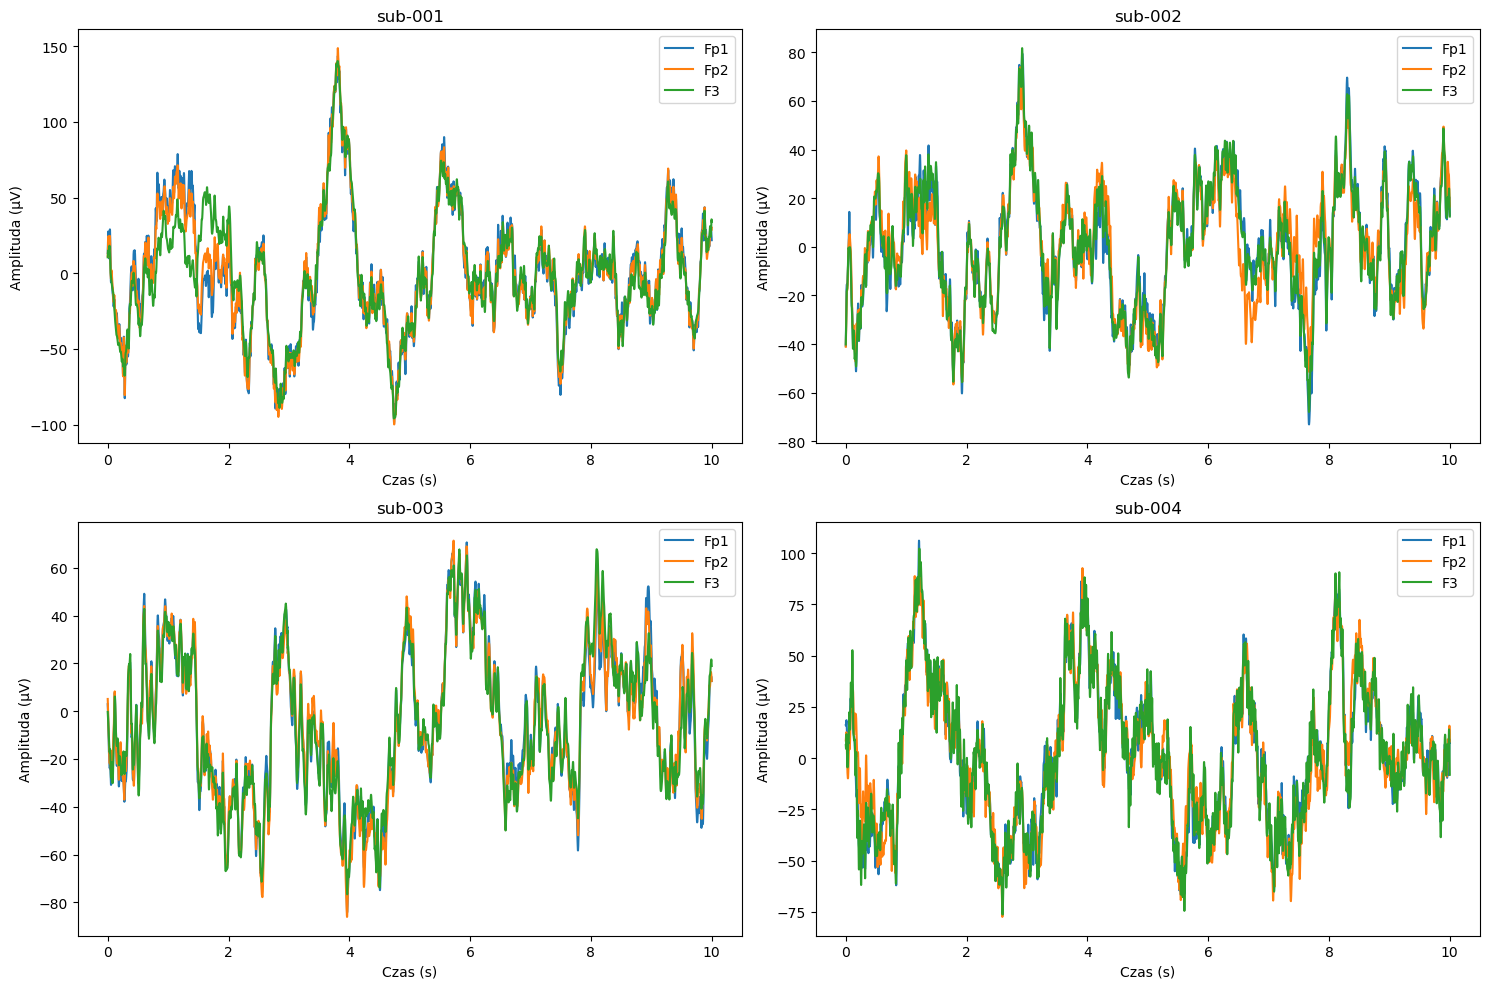

In [53]:
paths = [
    "Dementia/derivatives/sub-001/eeg/sub-001_task-eyesclosed_eeg.set",
    "Dementia/derivatives/sub-002/eeg/sub-002_task-eyesclosed_eeg.set",
    "Dementia/derivatives/sub-003/eeg/sub-003_task-eyesclosed_eeg.set",
    "Dementia/derivatives/sub-004/eeg/sub-004_task-eyesclosed_eeg.set"
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, path in enumerate(paths):
    raw = mne.io.read_raw_eeglab(path, preload=True)

    raw_crop = raw.copy().crop(tmin=30, tmax=40)

    picks = raw_crop.ch_names[:3]
    raw_crop.pick(picks)

    data, times = raw_crop.get_data(return_times=True)

    for ch in range(data.shape[0]):
        axes[i].plot(times, data[ch] * 1e6, label=picks[ch])  # µV

    axes[i].set_title(f"{path.split('/')[-3]}")
    axes[i].set_xlabel("Czas (s)")
    axes[i].set_ylabel("Amplituda (µV)")
    axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


## 3.3 Remote Healthcare Monitoring In Dementia

Dementia is a progressive condition that affects cognitive and functional abilities. There is a need for reliable and continuous health monitoring of People Living with Dementia (PLWD) to improve their quality of life and support their independent living. Healthcare services often focus on addressing and treating already established health conditions that affect PLWD. Managing these conditions continuously can inform better decision-making earlier for higher-quality care management for PLWD. The Technology Integrated Health Management (TIHM) project developed a new digital platform to routinely collect longitudinal observational and measurement data within the home and apply machine learning and analytical models for the detection and prediction of adverse health events affecting the well-being of PLWD. This work describes the TIHM dataset collected during the second phase (i.e., feasibility study) of the TIHM project. The data was collected from homes of 56 PLWD and associated with events and clinical observations (daily activity, physiological monitoring, and labels for health-related conditions). The study recorded an average of 50 days of data per participant, totalling 2803 days.

| Atrybut           | Opis                                                                                      |
|-------------------|-------------------------------------------------------------------------------------------|
| **Link**          | [https://zenodo.org/records/7622128](https://zenodo.org/records/7622128)                 |
| **Liczba próbek** | 2803 dni danych od 56 uczestników (średnio ~50 dni / uczestnika)                         |
| **Cechy**         | - Activity: `location_name`, `timestamp`, `patient_id`<br>- Sleep: `sleep_state`, `heart_rate`, `respiratory_rate`, `snoring`<br>- Physiology: `device_type`, `value`, `unit`<br>- Demographics: `sex`, `age_group` |
| **Rodzaj etykiet**| Klasyfikacja kategoryczna (6 klas zdarzeń klinicznych):<br>• Agitation<br>• Weight<br>• Heart rate<br>• Body temperature<br>• Blood pressure<br>• Body water |
| **Licencja**      | Creative Commons Attribution 4.0 International                                            |


In [60]:
dementia_tihm_activity_path = 'Dementia/TIHM_datasets/Activity.csv'
dementia_tihm_demographics_path = 'Dementia/TIHM_datasets/Demographics.csv'
dementia_tihm_labels_path = 'Dementia/TIHM_datasets/Labels.csv'
dementia_tihm_physiology_path = 'Dementia/TIHM_datasets/Physiology.csv'
dementia_tihm_sleep_path = 'Dementia/TIHM_datasets/Sleep.csv'

dementia_tihm_activity_df = pd.read_csv(dementia_tihm_activity_path)
dementia_tihm_demographics_df = pd.read_csv(dementia_tihm_demographics_path)
dementia_tihm_labels_df = pd.read_csv(dementia_tihm_labels_path)
dementia_tihm_physiology_df = pd.read_csv(dementia_tihm_physiology_path)
dementia_tihm_sleep_df = pd.read_csv(dementia_tihm_sleep_path)

print("🧠 Activity")
display(dementia_tihm_activity_df.head())

print("\n🧍 Demographics")
display(dementia_tihm_demographics_df.head())

print("\n⚠️ Labels")
display(dementia_tihm_labels_df.head())

print("\n🩺 Physiology")
display(dementia_tihm_physiology_df.head())

print("\n💤 Sleep")
display(dementia_tihm_sleep_df.head())

🧠 Activity


,patient_id,location_name,date
0,0697d,Fridge Door,2019-06-28 13:03:29
1,0697d,Kitchen,2019-06-28 13:11:44
2,0697d,Front Door,2019-06-28 13:13:50
3,0697d,Bedroom,2019-06-28 13:13:53
4,0697d,Fridge Door,2019-06-28 13:14:09



🧍 Demographics


,patient_id,age,sex
0,b9d58,"(70, 80]",Female
1,c55f8,"(80, 90]",Female
2,16f4b,"(80, 90]",Male
3,fd100,"(90, 110]",Female
4,1fbe4,"(80, 90]",Male



⚠️ Labels


,patient_id,date,type
0,c55f8,2019-04-04 09:10:21,Blood pressure
1,16f4b,2019-04-08 13:40:20,Blood pressure
2,16f4b,2019-04-11 12:00:22,Agitation
3,ec812,2019-04-12 09:10:29,Blood pressure
4,16f4b,2019-04-14 12:00:07,Agitation



🩺 Physiology


,patient_id,date,device_type,value,unit
0,0697d,2019-06-28 13:42:09,Body Temperature,36.072,Cel
1,0697d,2019-06-28 13:42:44,Body Temperature,35.831,Cel
2,0697d,2019-06-28 13:43:40,Body Temperature,35.831,Cel
3,0697d,2019-06-28 13:45:15,Systolic blood pressure,165.000,mm[Hg]
4,0697d,2019-06-28 13:45:15,Diastolic blood pressure,82.000,mm[Hg]



💤 Sleep


,patient_id,date,state,heart_rate,respiratory_rate,snoring
0,0f352,2019-06-25 22:53:00,AWAKE,69.0,14.0,False
1,0f352,2019-06-25 22:54:00,AWAKE,66.0,14.0,False
2,0f352,2019-06-25 22:55:00,AWAKE,70.0,14.0,False
3,0f352,2019-06-25 22:56:00,AWAKE,70.0,13.0,False
4,0f352,2019-06-25 22:57:00,AWAKE,68.0,13.0,False
